In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Создание новой таблицы с мутациями BRAF, NRAS 

In [2]:
transcripts = pd.read_csv('./TPM_mel+nev_oldref.csv')
transcripts

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,TPM_old,TPM/TPM_old
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),chr12,+,6534512.0,6535141,2.0,1.575493,2.021110,0.7795186803
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),chr12,+,6534517.0,6538374,9.0,920.101929,1232.805054,0.7463482779
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),chr12,+,6534532.0,6538374,9.0,171.943039,0.000000,#DIV/0!
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),chr12,+,6534533.0,6537996,8.0,0.598639,0.000000,#DIV/0!
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),chr12,+,6534534.0,6538374,9.0,94.857643,2.514925,37.71788145
...,...,...,...,...,...,...,...,...,...,...,...
931,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDH-DT (ENST00000537921),chr12,-,6532290.0,6533498,2.0,0.000000,0.000000,#DIV/0!
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),chr19,+,35533455.0,35543026,6.0,0.000000,0.000000,#DIV/0!
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),chr19,+,35533456.0,35545599,11.0,0.000000,0.000000,#DIV/0!
934,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),chr19,+,35536783.0,35543026,6.0,4.727840,7.873865,0.6004471756


In [3]:
geo2r = pd.read_csv('./geo2r_mn.csv')
geo2r

,Group,Accession,Title,Source name,Tissue,Group.1,Nevus type,Braf mutation,Nras mutation,Melanoma on nevus
0,-,GSM3071633,LE.063.SP.064_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
1,-,GSM3071634,LE.117.RB.118_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,mut,NaN
2,-,GSM3071635,FKH.021.022_N,skin,benign melanocytic nevi,Naevi_1,compound,mut,wt,NaN
3,-,GSM3071636,LE.081.TR.082_N,skin,benign melanocytic nevi,Naevi_1,dermal,wt,mut,NaN
4,-,GSM3071637,BO.001.SH.002_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
...,...,...,...,...,...,...,...,...,...,...
75,-,GSM3071708,FKH.007_M,skin,primary melanoma,Mel_2,NaN,wt,wt,yes
76,-,GSM3071709,LE.085.BU_M,skin,primary melanoma,Mel_2,NaN,mut,wt,no
77,-,GSM3071710,RS_M,skin,primary melanoma,Mel_2,NaN,mut,wt,no
78,-,GSM3071711,BO.027.SM_M,skin,primary melanoma,Mel_2,NaN,wt,mut,no


In [4]:
sampls = []
for i in geo2r['Title'].unique():
    for j in transcripts['sample_SRR'].unique():
        if i in j:
            sampls.append(i)
sampls.remove('SH_M')
sampls.remove('BE_M')
sampls.remove('RG_M')
len(sampls)

53

In [5]:
geo2r_ed = geo2r[geo2r['Title'].isin(sampls)].reset_index(drop=True)
geo2r_ed

,Group,Accession,Title,Source name,Tissue,Group.1,Nevus type,Braf mutation,Nras mutation,Melanoma on nevus
0,-,GSM3071633,LE.063.SP.064_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
1,-,GSM3071634,LE.117.RB.118_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,mut,NaN
2,-,GSM3071635,FKH.021.022_N,skin,benign melanocytic nevi,Naevi_1,compound,mut,wt,NaN
3,-,GSM3071636,LE.081.TR.082_N,skin,benign melanocytic nevi,Naevi_1,dermal,wt,mut,NaN
4,-,GSM3071637,BO.001.SH.002_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
5,-,GSM3071640,LE.037.RG.038_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
6,-,GSM3071642,LE.029.SE.030_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
7,-,GSM3071644,LE.021.TH.022_N,skin,benign melanocytic nevi,Naevi_1,compound,mut,mut,NaN
8,-,GSM3071645,FKH.027.028_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,mut,NaN
9,-,GSM3071647,LE.129.NG_M,skin,primary melanoma,Mel_1,NaN,wt,mut,no


In [6]:
for i in geo2r_ed['Title'].unique():
    for j in transcripts['sample_SRR'].unique():
        if i in j:
            geo2r_ed['Title'].replace(i,j,inplace=True)
geo2r_ed

,Group,Accession,Title,Source name,Tissue,Group.1,Nevus type,Braf mutation,Nras mutation,Melanoma on nevus
0,-,GSM3071633,SRR6916886_GSM3071633_LE.063.SP.064_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
1,-,GSM3071634,SRR6916887_GSM3071634_LE.117.RB.118_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,mut,NaN
2,-,GSM3071635,SRR6916888_GSM3071635_FKH.021.022_N,skin,benign melanocytic nevi,Naevi_1,compound,mut,wt,NaN
3,-,GSM3071636,SRR6916889_GSM3071636_LE.081.TR.082_N,skin,benign melanocytic nevi,Naevi_1,dermal,wt,mut,NaN
4,-,GSM3071637,SRR6916890_GSM3071637_BO.001.SH.002_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
5,-,GSM3071640,SRR6916893_GSM3071640_LE.037.RG.038_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
6,-,GSM3071642,SRR6916895_GSM3071642_LE.029.SE.030_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,wt,NaN
7,-,GSM3071644,SRR6916897_GSM3071644_LE.021.TH.022_N,skin,benign melanocytic nevi,Naevi_1,compound,mut,mut,NaN
8,-,GSM3071645,SRR6916898_GSM3071645_FKH.027.028_N,skin,benign melanocytic nevi,Naevi_1,dermal,mut,mut,NaN
9,-,GSM3071647,SRR6916900_GSM3071647_LE.129.NG_M,skin,primary melanoma,Mel_1,NaN,wt,mut,no


In [7]:
trtitle = transcripts.rename(columns={"sample_SRR":"Title"})
trtitle

,Title,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,TPM_old,TPM/TPM_old
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),chr12,+,6534512.0,6535141,2.0,1.575493,2.021110,0.7795186803
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),chr12,+,6534517.0,6538374,9.0,920.101929,1232.805054,0.7463482779
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),chr12,+,6534532.0,6538374,9.0,171.943039,0.000000,#DIV/0!
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),chr12,+,6534533.0,6537996,8.0,0.598639,0.000000,#DIV/0!
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),chr12,+,6534534.0,6538374,9.0,94.857643,2.514925,37.71788145
...,...,...,...,...,...,...,...,...,...,...,...
931,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDH-DT (ENST00000537921),chr12,-,6532290.0,6533498,2.0,0.000000,0.000000,#DIV/0!
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),chr19,+,35533455.0,35543026,6.0,0.000000,0.000000,#DIV/0!
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),chr19,+,35533456.0,35545599,11.0,0.000000,0.000000,#DIV/0!
934,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),chr19,+,35536783.0,35543026,6.0,4.727840,7.873865,0.6004471756


In [22]:
columns = ['Group', 'Accession', 'Source name', 'Tissue', 'Group.1', 'Nevus type', 'Melanoma on nevus']
result = pd.merge(trtitle, geo2r_ed, on='Title').drop(columns, axis=1)
result['mut'] = result['Braf mutation'].astype(str) + result['Nras mutation']
result

,Title,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,TPM_old,TPM/TPM_old,Braf mutation,Nras mutation,mut
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),chr12,+,6534512.0,6535141,2.0,1.575493,2.021110,0.7795186803,wt,mut,wtmut
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),chr12,+,6534517.0,6538374,9.0,920.101929,1232.805054,0.7463482779,wt,mut,wtmut
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),chr12,+,6534532.0,6538374,9.0,171.943039,0.000000,#DIV/0!,wt,mut,wtmut
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),chr12,+,6534533.0,6537996,8.0,0.598639,0.000000,#DIV/0!,wt,mut,wtmut
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),chr12,+,6534534.0,6538374,9.0,94.857643,2.514925,37.71788145,wt,mut,wtmut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDH-DT (ENST00000537921),chr12,-,6532290.0,6533498,2.0,0.000000,0.000000,#DIV/0!,mut,mut,mutmut
931,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),chr19,+,35533455.0,35543026,6.0,0.000000,0.000000,#DIV/0!,mut,mut,mutmut
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),chr19,+,35533456.0,35545599,11.0,0.000000,0.000000,#DIV/0!,mut,mut,mutmut
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),chr19,+,35536783.0,35543026,6.0,4.727840,7.873865,0.6004471756,mut,mut,mutmut


In [18]:
result = result.replace(['wtmut', 'mutwt', 'mutmut', 'wtwt'], ['$\it{BRAF-}$/$\it{NRAS+}$','$\it{BRAF+}$/$\it{NRAS-}$','$\it{BRAF+}$/$\it{NRAS+}$','$\it{BRAF-}$/$\it{NRAS-}$'])
result

,Title,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,TPM_old,TPM/TPM_old,Braf mutation,Nras mutation,mut
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),chr12,+,6534512.0,6535141,2.0,1.575493,2.021110,0.7795186803,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),chr12,+,6534517.0,6538374,9.0,920.101929,1232.805054,0.7463482779,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),chr12,+,6534532.0,6538374,9.0,171.943039,0.000000,#DIV/0!,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),chr12,+,6534533.0,6537996,8.0,0.598639,0.000000,#DIV/0!,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),chr12,+,6534534.0,6538374,9.0,94.857643,2.514925,37.71788145,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDH-DT (ENST00000537921),chr12,-,6532290.0,6533498,2.0,0.000000,0.000000,#DIV/0!,mut,mut,$\it{BRAF+}$/$\it{NRAS+}$
931,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),chr19,+,35533455.0,35543026,6.0,0.000000,0.000000,#DIV/0!,mut,mut,$\it{BRAF+}$/$\it{NRAS+}$
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),chr19,+,35533456.0,35545599,11.0,0.000000,0.000000,#DIV/0!,mut,mut,$\it{BRAF+}$/$\it{NRAS+}$
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),chr19,+,35536783.0,35543026,6.0,4.727840,7.873865,0.6004471756,mut,mut,$\it{BRAF+}$/$\it{NRAS+}$


In [10]:
result_mel.type_of_tissue.unique()

NameError: name 'result_mel' is not defined

In [19]:
result_mel = result.drop(result[result.type_of_tissue == 'N1'].index).drop(result[result.type_of_tissue == 'N2'].index)
result_mel

,Title,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,TPM_old,TPM/TPM_old,Braf mutation,Nras mutation,mut
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),chr12,+,6534512.0,6535141,2.0,1.575493,2.021110,0.7795186803,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),chr12,+,6534517.0,6538374,9.0,920.101929,1232.805054,0.7463482779,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),chr12,+,6534532.0,6538374,9.0,171.943039,0.000000,#DIV/0!,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),chr12,+,6534533.0,6537996,8.0,0.598639,0.000000,#DIV/0!,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),chr12,+,6534534.0,6538374,9.0,94.857643,2.514925,37.71788145,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDH-DT (ENST00000537921),chr12,-,6532290.0,6533498,2.0,0.000000,0.000000,#DIV/0!,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
643,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDHS1 (ENST00000586334),chr19,+,35533455.0,35543026,6.0,0.000000,0.000000,#DIV/0!,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
644,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDHS2 (ENST00000222286),chr19,+,35533456.0,35545599,11.0,0.000000,0.000000,#DIV/0!,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$
645,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDHS3 (ENST00000585510),chr19,+,35536783.0,35543026,6.0,3.023940,4.915389,0.6151985123,wt,mut,$\it{BRAF-}$/$\it{NRAS+}$


# Сравнение транскриптов braf_mut+/- и nras_mut+/- групп

## Значения TPM в образцах в разных транскриптах

<Figure size 1080x720 with 0 Axes>

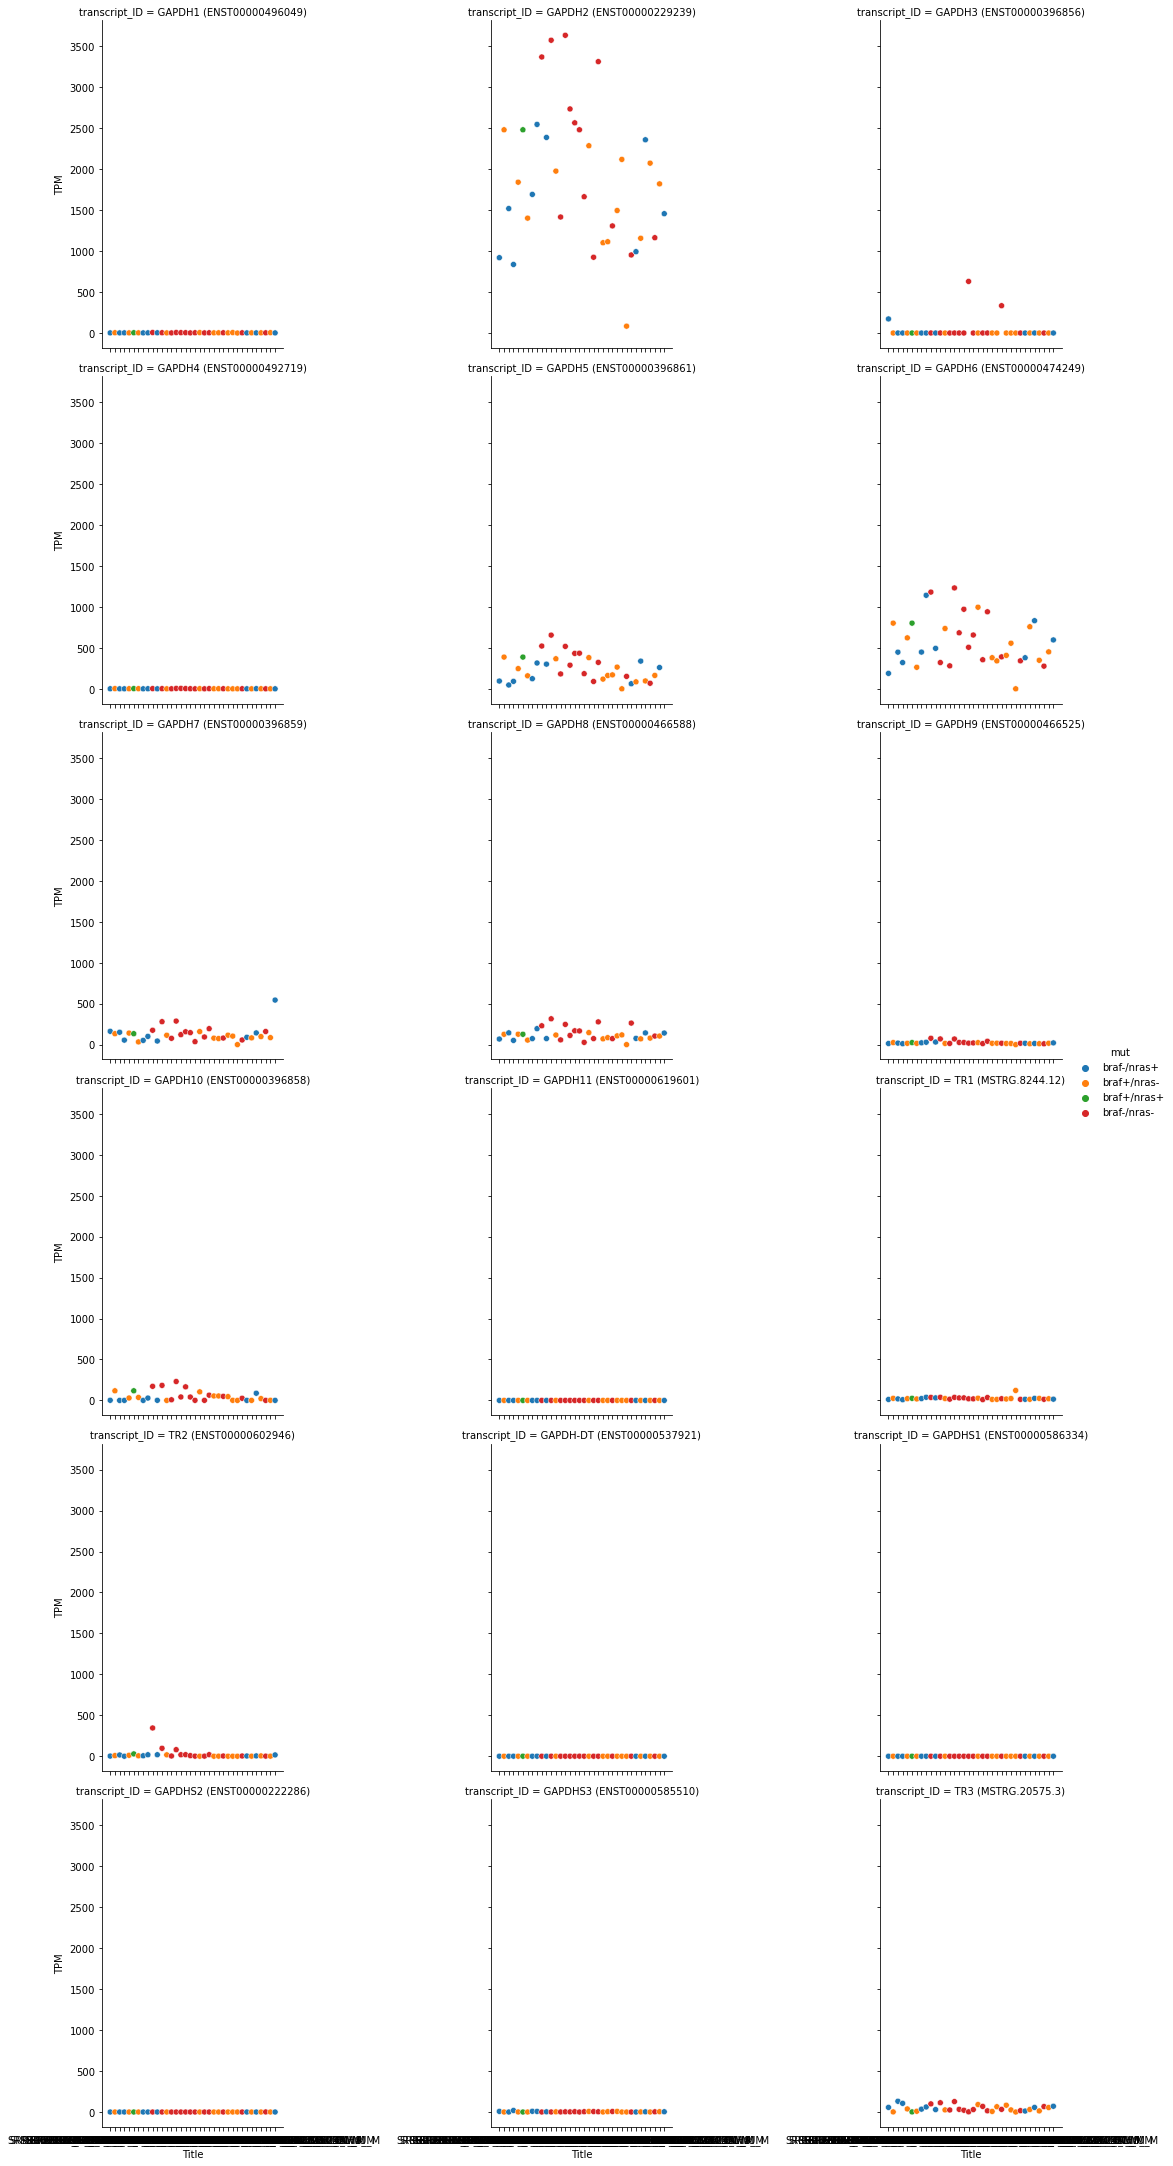

In [12]:
plt.figure(figsize=(15,10))
tpmm = sns.relplot(data=result_mel, x="Title", y="TPM", col='transcript_ID', hue="mut",col_wrap=3)
plt.show()

## TPM

In [20]:
gapdh5 = result_mel[result_mel.transcript_ID == "GAPDH5 (ENST00000396861)"]
gapdh2 = result_mel[result_mel.transcript_ID == "GAPDH2 (ENST00000229239)"]
gapdh6 = result_mel[result_mel.transcript_ID == "GAPDH6 (ENST00000474249)"]
gapdhs = result_mel[result_mel.transcript_ID == "TR3 (MSTRG.20575.3)"]
gapdhs3 = result_mel[result_mel.transcript_ID == "GAPDHS3 (ENST00000585510)"]

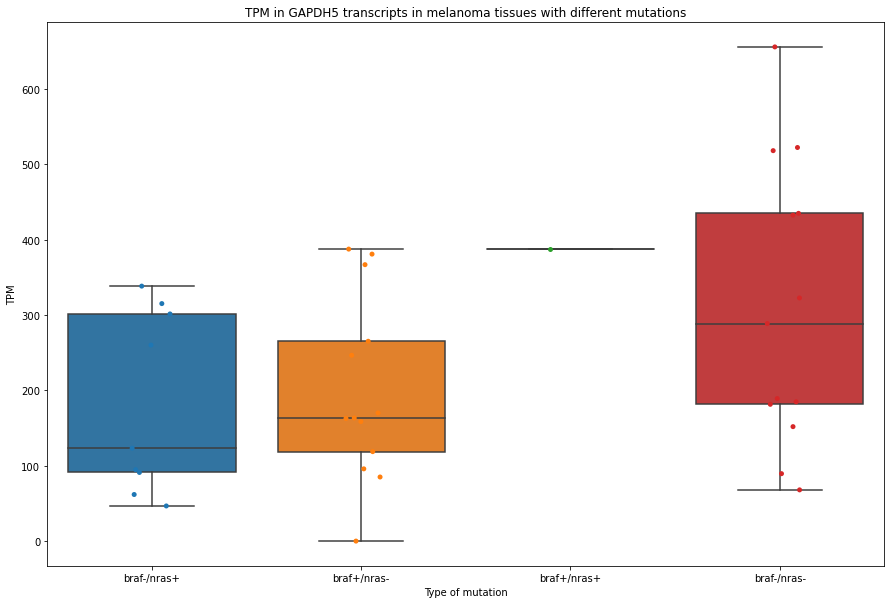

In [119]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh5, x='mut',y='TPM')
sns.stripplot(data=gapdh5, x='mut',y='TPM')
plt.title("TPM in GAPDH5 transcripts in melanoma tissues with different mutations")
plt.ylabel("TPM")
plt.xlabel("Type of mutation")
plt.show()

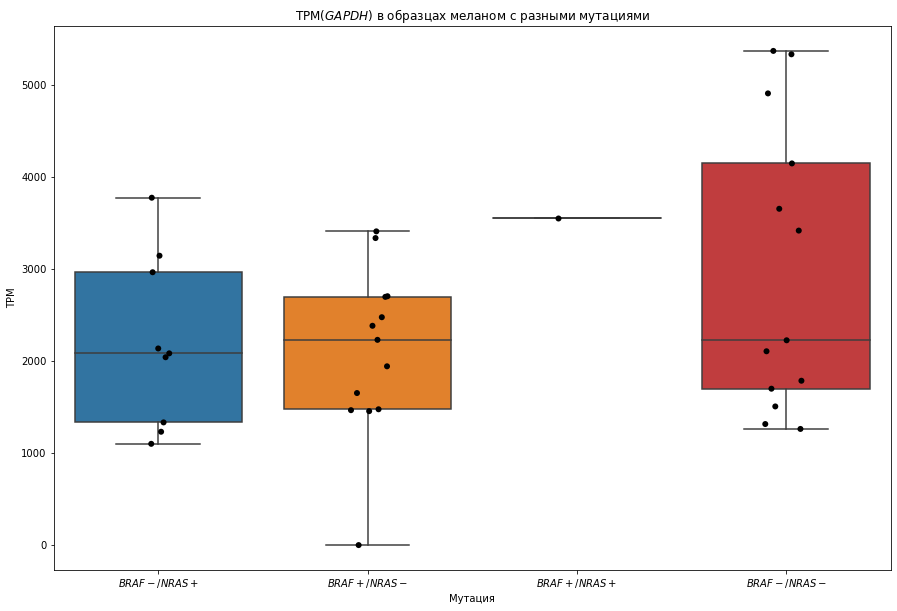

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh2, x='mut',y='TPM_old')
sns.stripplot(data=gapdh2, x='mut',y='TPM_old', size=6, color='black')
plt.title("TPM($\it{GAPDH}$) в образцах меланом с разными мутациями")
plt.ylabel("TPM")
plt.xlabel("Мутация")
plt.show()

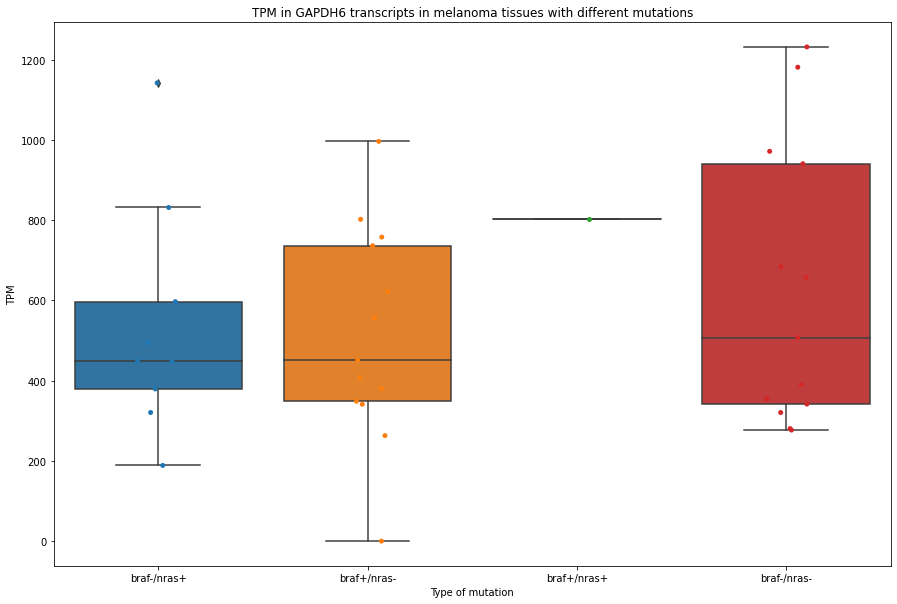

In [121]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh6, x='mut',y='TPM')
sns.stripplot(data=gapdh6, x='mut',y='TPM')
plt.title("TPM in GAPDH6 transcripts in melanoma tissues with different mutations")
plt.ylabel("TPM")
plt.xlabel("Type of mutation")
plt.show()

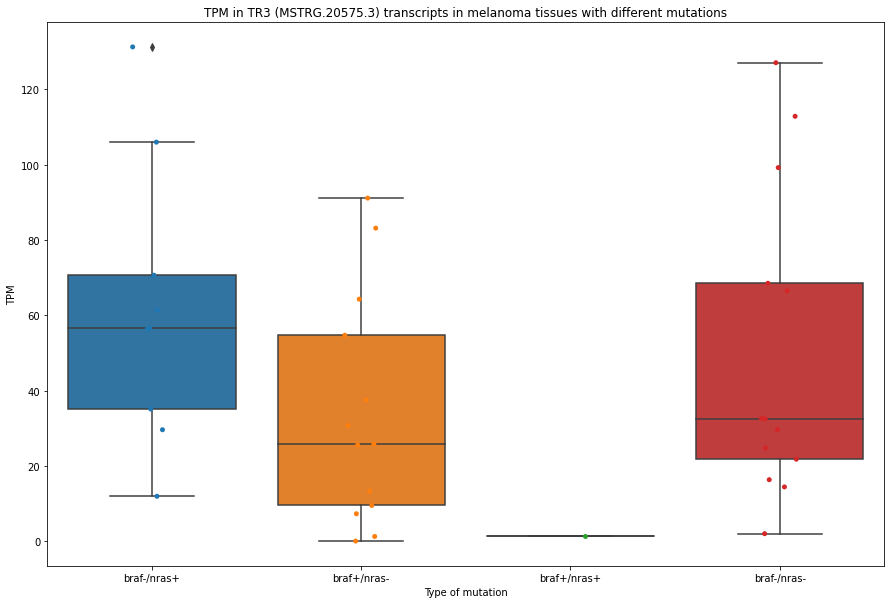

In [122]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdhs, x='mut',y='TPM')
sns.stripplot(data=gapdhs, x='mut',y='TPM')
plt.title("TPM in TR3 (MSTRG.20575.3) transcripts in melanoma tissues with different mutations")
plt.ylabel("TPM")
plt.xlabel("Type of mutation")
plt.show()

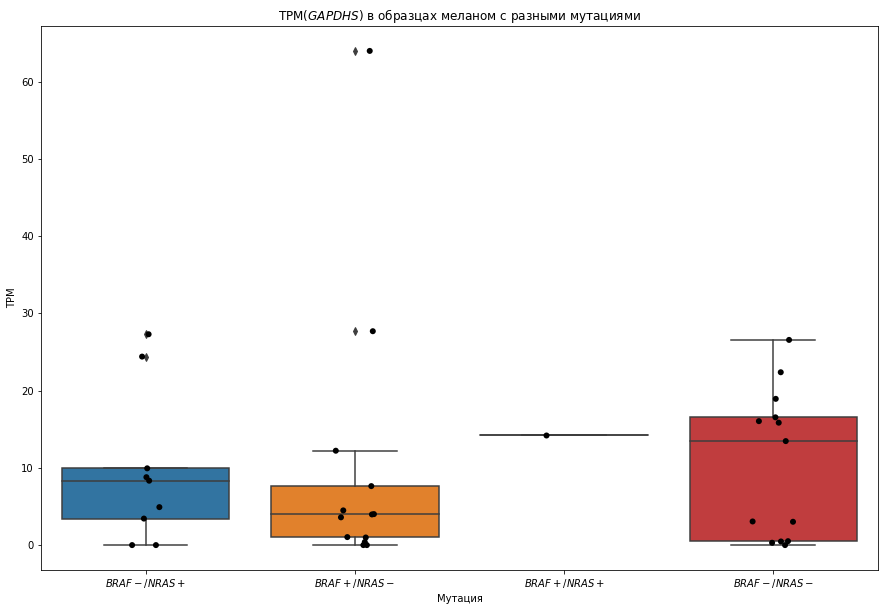

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdhs3, x='mut',y='TPM_old')
sns.stripplot(data=gapdhs3, x='mut',y='TPM_old', size=6, color='black')
plt.title("TPM($\it{GAPDHS}$) в образцах меланом с разными мутациями")
plt.ylabel("TPM")
plt.xlabel("Мутация")
plt.show()

In [ ]:
gapdh5 = result_mel[result_mel.transcript_ID == "GAPDH5 (ENST00000396861)"]
gapdh = result_mel[result_mel.transcript_ID == "GAPDH2 (ENST00000229239)"]
gapdh6 = result_mel[result_mel.transcript_ID == "GAPDH6 (ENST00000474249)"]
gapdhs = result_mel[result_mel.transcript_ID == "TR3 (MSTRG.20575.3)"]
gapdhs3 = result_mel[result_mel.transcript_ID == "GAPDHS3 (ENST00000585510)"]

# Стат анализ

Для начала проверим наши данные на нормальность. Сделаю это с помощью теста Шапиро-Уилка, в котором нулевая гипотеза — образец имеет гауссово распределение, а альтернативная — не имеет. Уровень значимости я взял 5%.

In [ ]:
gapdh5 = result_mel[result_mel.transcript_ID == "GAPDH5 (ENST00000396861)"]
gapdh2 = result_mel[result_mel.transcript_ID == "GAPDH2 (ENST00000229239)"]
gapdh6 = result_mel[result_mel.transcript_ID == "GAPDH6 (ENST00000474249)"]
gapdhs = result_mel[result_mel.transcript_ID == "TR3 (MSTRG.20575.3)"]
gapdhs3 = result_mel[result_mel.transcript_ID == "GAPDHS3 (ENST00000585510)"]

### GAPDH5

In [127]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh5[gapdh5.mut == 'braf-/nras+']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.06630320101976395
Statistic value: 0.8454030752182007


In [130]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh5[gapdh5.mut == 'braf+/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.3136606812477112
Statistic value: 0.9272576570510864


In [131]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh5[gapdh5.mut == 'braf-/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.38330408930778503
Statistic value: 0.9339371919631958


### GAPDH2

In [132]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh2[gapdh2.mut == 'braf-/nras+']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.21357007324695587
Statistic value: 0.8928837180137634


In [133]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh2[gapdh2.mut == 'braf+/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.33112481236457825
Statistic value: 0.9290434122085571


In [134]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh2[gapdh2.mut == 'braf-/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.08561902493238449
Statistic value: 0.8858476281166077


### GAPDH6

In [135]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh6[gapdh6.mut == 'braf-/nras+']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.24660994112491608
Statistic value: 0.8990615010261536


In [136]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh6[gapdh6.mut == 'braf+/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.9648981094360352
Statistic value: 0.9774702191352844


In [137]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh6[gapdh6.mut == 'braf-/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.04204292595386505
Statistic value: 0.8628734350204468


### TR3

In [138]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs[gapdhs.mut == 'braf-/nras+']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.6162514686584473
Statistic value: 0.943227231502533


In [139]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs[gapdhs.mut == 'braf+/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.15431931614875793
Statistic value: 0.9045320153236389


In [140]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs[gapdhs.mut == 'braf-/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.05832280218601227
Statistic value: 0.8735277652740479


### GAPDHS3

In [141]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs3[gapdhs3.mut == 'braf-/nras+']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.06696902215480804
Statistic value: 0.8457952737808228


In [142]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs3[gapdhs3.mut == 'braf+/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.0036039724946022034
Statistic value: 0.7761974930763245


In [143]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs3[gapdhs3.mut == 'braf-/nras-']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

P-value: 0.22832003235816956
Statistic value: 0.9169801473617554


В большинстве случаев P-values больше уровня значимости (0.05), что говорит нам о том, что у нас нет достаточно оснований отвергнуть нулевую гипотезу. Следовательно, мы можем принять наши распределения за нормальные. Поэтому по-хорошему далее надо использовать t-тест.

Но есть 2 случая, когда значения ТРМ распределены ненормально (на уровне значимости 0.05 у нас достаточно оснований отвергнуть нулевую гипотезу). Это случаи braf+/nras- GAPDHS3 и braf-/nras- GAPDH6. 

Поэтому будет правильнее использовать 1 тест на все данные: U-тест.

В качетве нулевой гипотезы была взята гипотеза о том, что значения ТРМ мутантов не отличаются от ТРМ дикого типа, альтернативная — отличаются. Уровень значимости — 5%.

### GAPDH5

In [163]:
scipy.stats.mannwhitneyu(list(gapdh5[gapdh5.mut == 'braf-/nras+']['TPM']), list(gapdh5[gapdh5.mut == 'braf-/nras-']['TPM']))

MannwhitneyuResult(statistic=34.0, pvalue=0.05450339490772108)

In [164]:
scipy.stats.mannwhitneyu(list(gapdh5[gapdh5.mut == 'braf+/nras-']['TPM']), list(gapdh5[gapdh5.mut == 'braf-/nras-']['TPM']))

MannwhitneyuResult(statistic=53.0, pvalue=0.05594630692531096)

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ мутантов и ТРМ дикого типа.

### GAPDH2

In [26]:
scipy.stats.mannwhitneyu(list(gapdh2[gapdh2.mut == '$\it{BRAF-}$/$\it{NRAS+}$']['TPM_old']), list(gapdh2[gapdh2.mut == '$\it{BRAF-}$/$\it{NRAS-}$']['TPM_old']))

MannwhitneyuResult(statistic=41.0, pvalue=0.12814011862216218)

In [27]:
scipy.stats.mannwhitneyu(list(gapdh2[gapdh2.mut == '$\it{BRAF+}$/$\it{NRAS-}$']['TPM']), list(gapdh2[gapdh2.mut == '$\it{BRAF-}$/$\it{NRAS-}$']['TPM']))

MannwhitneyuResult(statistic=57.5, pvalue=0.08704054593193095)

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ мутантов и ТРМ дикого типа.

### GAPDH6

In [154]:
scipy.stats.mannwhitneyu(list(gapdh6[gapdh6.mut == 'braf-/nras+']['TPM']), list(gapdh6[gapdh6.mut == 'braf-/nras-']['TPM']))

MannwhitneyuResult(statistic=52.5, pvalue=0.35666665791620566)

In [155]:
scipy.stats.mannwhitneyu(list(gapdh6[gapdh6.mut == 'braf+/nras-']['TPM']), list(gapdh6[gapdh6.mut == 'braf-/nras-']['TPM']))

MannwhitneyuResult(statistic=76.0, pvalue=0.3408089321365418)

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ мутантов и ТРМ дикого типа.

### TR3

In [160]:
scipy.stats.mannwhitneyu(list(gapdhs[gapdhs.mut == 'braf-/nras+']['TPM']), list(gapdhs[gapdhs.mut == 'braf-/nras-']['TPM']))

MannwhitneyuResult(statistic=45.0, pvalue=0.1926657633947762)

In [161]:
scipy.stats.mannwhitneyu(list(gapdhs[gapdhs.mut == 'braf+/nras-']['TPM']), list(gapdhs[gapdhs.mut == 'braf-/nras-']['TPM']))

MannwhitneyuResult(statistic=63.0, pvalue=0.14075731625501137)

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ мутантов и ТРМ дикого типа.

### GAPDHS3

In [28]:
scipy.stats.mannwhitneyu(list(gapdhs3[gapdhs3.mut == '$\it{BRAF-}$/$\it{NRAS+}$']['TPM_old']), list(gapdhs3[gapdhs3.mut == '$\it{BRAF-}$/$\it{NRAS-}$']['TPM_old']))

MannwhitneyuResult(statistic=56.0, pvalue=0.4468170580181048)

In [29]:
scipy.stats.mannwhitneyu(list(gapdhs3[gapdhs3.mut == '$\it{BRAF+}$/$\it{NRAS-}$']['TPM_old']), list(gapdhs3[gapdhs3.mut == '$\it{BRAF-}$/$\it{NRAS-}$']['TPM_old']))

MannwhitneyuResult(statistic=73.0, pvalue=0.28621080392761755)

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ мутантов и ТРМ дикого типа.

# Хар-ки групп по мутациям

## Среднее значение TPM в транскриптах в разных группах

In [12]:
meann = pd.crosstab(result_mel.transcript_ID, result_mel.mut, values = result_mel.TPM, aggfunc='mean')
meann

mut,braf+/nras+,braf+/nras-,braf-/nras+,braf-/nras-
transcript_ID,,,,
GAPDH-DT (ENST00000537921),0.426012,0.054608,0.110056,0.232931
GAPDH1 (ENST00000496049),3.306427,2.588448,1.756124,3.192245
GAPDH10 (ENST00000396858),117.412979,35.948952,13.450952,75.793639
GAPDH11 (ENST00000619601),0.035743,0.023412,0.017835,0.056555
GAPDH2 (ENST00000229239),2482.122314,1612.597424,1635.302470,2239.735042
GAPDH3 (ENST00000396856),0.000000,0.056940,19.202420,74.228835
GAPDH4 (ENST00000492719),2.403832,0.725611,0.351583,1.718488
GAPDH5 (ENST00000396861),387.553253,200.137776,181.447742,310.804010
GAPDH6 (ENST00000474249),802.179565,512.672359,538.895206,626.064028


In [13]:
dataa = {'Mutation': ['braf+/nras-','braf-/nras-','braf-/nras+','braf+/nras+'],
        'Mean TPM': [meann['braf+/nras-'].mean(), meann['braf-/nras-'].mean(), meann['braf-/nras+'].mean(), meann['braf+/nras+'].mean()]}
dfm = pd.DataFrame(dataa)
dfm

,Mutation,Mean TPM
0,braf+/nras-,146.315470
1,braf-/nras-,210.699846
2,braf-/nras+,153.519162
3,braf+/nras+,229.685353


## Подсчет количества реплик 

In [187]:
cntt = result_mel['mut'].value_counts()
ctt = []
for i in cntt:
    i = int(i/18)
    ctt.append(i)

In [191]:
data = {'Mutation': ['braf+/nras-','braf-/nras-','braf-/nras+','braf+/nras+'],
        'Count': ctt}
dfct = pd.DataFrame(data)
dfct

,Mutation,Count
0,braf+/nras-,13
1,braf-/nras-,13
2,braf-/nras+,9
3,braf+/nras+,1
